# read label

In [1]:
import pandas as pd

## bounding box

In [2]:
bbox_table = pd.read_csv('data/BBox_List_2017.csv')

In [3]:
bbox_table

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,NaN,NaN,NaN


## 4 bbox values

In [7]:
bbox_table['Bbox [x']

0      225.084746
1      686.101695
2      221.830508
3      726.237288
4      660.067797
          ...    
979    198.940451
980    701.838229
981    140.913785
982    175.047118
983    343.438229
Name: Bbox [x, Length: 984, dtype: float64

In [8]:
bbox_table['y']

0      547.019217
1      131.543498
2      317.053115
3      494.951420
4      569.780787
          ...    
979    352.900747
980    572.491858
981    658.962969
982    580.456302
983    446.198524
Name: y, Length: 984, dtype: float64

In [9]:
bbox_table['w']

0       86.779661
1      185.491525
2      155.118644
3      141.016949
4      200.677966
          ...    
979    615.537778
980    103.537778
981    271.928889
982    244.622222
983    120.604444
Name: w, Length: 984, dtype: float64

In [10]:
bbox_table['h]']

0       79.186441
1      313.491525
2      216.949153
3       55.322034
4       78.101695
          ...    
979    323.128889
980     63.715556
981     94.435556
982    103.537778
983     53.475556
Name: h], Length: 984, dtype: float64

## check how many classes

In [85]:
set(bbox_table['Finding Label'])

{'Atelectasis',
 'Cardiomegaly',
 'Effusion',
 'Infiltrate',
 'Mass',
 'Nodule',
 'Pneumonia',
 'Pneumothorax'}

## show on image

In [48]:
# target image
image_name = bbox_table['Image Index'][500]

In [49]:
# label of the target image
label = bbox_table[bbox_table['Image Index'] == image_name]
label

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
500,00028285_014.png,Infiltrate,636.586667,396.269045,234.382222,360.675556,NaN,NaN,NaN
774,00028285_014.png,Pneumonia,660.480000,456.571267,210.488889,333.368889,NaN,NaN,NaN


In [59]:
print(list(label['Bbox [x'])[0])
print(list(label['y'])[0])
print(list(label['w'])[0])
print(list(label['h]'])[0])

636.586666666667
396.269045138889
234.382222222222
360.675555555556


In [67]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [68]:
img = cv2.imread('data/images/{}'.format(bbox_table['Image Index'][0]))

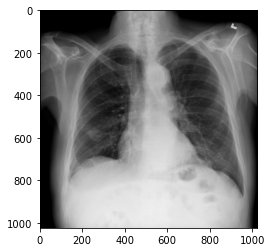

In [69]:
plt.imshow(img)

In [70]:
##:                +------------------+
##:                |                  |
##:              height               |
##:                |                  |
##:               (xy)---- width -----+

In [71]:
label_color = ['red', 'blue', 'green', 'orange', 'cyan']

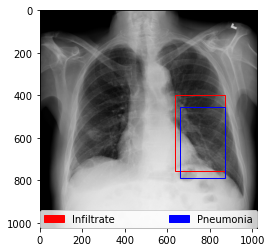

In [82]:
# add label bbox
plt.imshow(img)

ax = plt.gca()

_patches = []

# a image might have many labels
for i in range(len(list(label['y']))):
    rect = patches.Rectangle((list(label['Bbox [x'])[i], list(label['y'])[i]),
                            list(label['w'])[i], list(label['h]'])[i],
                            linewidth=1, edgecolor=label_color[i], fill=False )
    ax.add_patch(rect)

    _patches.append(patches.Patch(color=label_color[i], label=list(label['Finding Label'])[i]))
    
plt.legend(handles=_patches, ncol=2, loc='lower left', mode='expand', borderaxespad=0.)

plt.show()

In [ ]:
# according to wiki
# A pulmonary infiltrate is a substance denser than air, such as pus, blood, or protein, which lingers within the parenchyma of the lungs.[1] 
# Pulmonary infiltrates are associated with pneumonia, and tuberculosis.